In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [41]:
#load the dataset
data = pandas.read_csv('communities.csv')
data.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
data = data.replace(to_replace =["?"], value = np.nan ) 

In [43]:
data.shape

(1994, 127)

In [44]:
#If null value is more than 80%

data = data.loc[:, data.isnull().mean() < .8]

In [45]:
data.shape

(1994, 105)

In [46]:
data = data.iloc[:,5:127]

In [47]:
data.shape

(1994, 100)

In [48]:
data.isnull().sum().head(50)

 population              0
 householdsize           0
 racepctblack            0
 racePctWhite            0
 racePctAsian            0
 racePctHisp             0
 agePct12t21             0
 agePct12t29             0
 agePct16t24             0
 agePct65up              0
 numbUrban               0
 pctUrban                0
 medIncome               0
 pctWWage                0
 pctWFarmSelf            0
 pctWInvInc              0
 pctWSocSec              0
 pctWPubAsst             0
 pctWRetire              0
 medFamInc               0
 perCapInc               0
 whitePerCap             0
 blackPerCap             0
 indianPerCap            0
 AsianPerCap             0
 HispPerCap              0
 NumUnderPov             0
 PctPopUnderPov          0
 PctLess9thGrade         0
 PctNotHSGrad            0
 PctBSorMore             0
 PctUnemployed           0
 PctEmploy               0
 PctEmplManu             0
 PctEmplProfServ         0
 PctOccupManu            0
 PctOccupMgmtProf        0
 

In [49]:
data.iloc[:,24].isnull().sum()

0

In [52]:
#Splitting the data into X and Y
#We are removinf the column County, Community because the null value is more than 80%
#we are removing the columns communityname string because we are considering only the state names instead of city which are
#present inside the state
X = data.iloc[:, :98]
Y =data.iloc[:, 99]

In [54]:
Y.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name:  ViolentCrimesPerPop , dtype: float64

In [55]:
#Splitting the training, testing and cross validation data

train_samples = int(len(X)*0.6)
val_samples = int(len(X)*0.2)
X_train = X.iloc[:train_samples, :]
Y_train = Y.iloc[:train_samples]
X_val = X.iloc[train_samples:(train_samples + val_samples), :]
Y_val = Y.iloc[train_samples:(train_samples + val_samples)]
X_test = X.iloc[(train_samples + val_samples):, :]
Y_test = Y.iloc[(train_samples + val_samples):]

A Linear Model


In [56]:
model = sm.OLS(Y_train.to_numpy(), X_train.to_numpy())
trained_model = model.fit()
print(trained_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.853
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              65.27
Date:                Fri, 01 May 2020   Prob (F-statistic):                        0.00
Time:                        17:47:11   Log-Likelihood:                          732.00
No. Observations:                1196   AIC:                                     -1268.
Df Residuals:                    1098   BIC:                                     -769.5
Df Model:                          98                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, 'Testing Data')

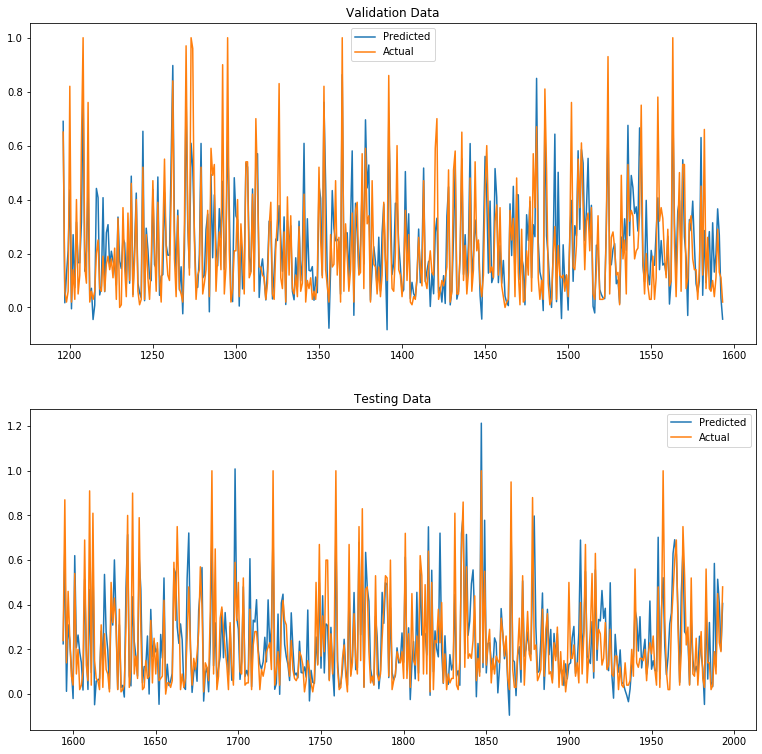

In [58]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(2, 1, 1)
ax.plot(trained_model.predict(X_val), label='Predicted')
ax.plot(Y_val, label='Actual')
ax.legend()
ax.set_title('Validation Data')
ax = fig.add_subplot(2, 1, 2)
ax.plot(trained_model.predict(X_test), label='Predicted')
ax.plot(Y_test, label='Actual')
ax.legend()
ax.set_title('Testing Data')

In [59]:
out = LinearRegression(fit_intercept = False).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
print(out.coef_)
print(out.score(X_train.to_numpy(), Y_train.to_numpy()))

[ 1.39866146e-01 -7.32954638e-03  2.88150451e-01 -4.17728809e-02
 -2.64168802e-02  7.89719209e-02  2.66039757e-01 -2.26052936e-01
 -2.90959763e-01  1.01981051e-01 -3.32695084e-01  5.35053653e-02
 -3.50544882e-02 -4.72309096e-02  7.96541228e-02 -1.92803585e-01
  2.03471949e-01  5.79851001e-02 -9.87053642e-02  2.58638747e-01
  2.51394566e-02 -2.70109638e-01 -3.19849761e-02 -4.68348916e-02
  3.03547554e-02  4.41000347e-02  4.72503203e-02 -1.64680585e-01
 -1.50108364e-01  1.07489630e-01  1.27549906e-01 -1.48526003e-02
  2.39562145e-01 -4.39967166e-02  7.04029838e-03  5.71725836e-02
  2.38939540e-02  7.01583174e-01  3.22289079e-01  4.01536452e-01
 -9.89902549e-01 -1.24641487e-01 -1.61525228e-01 -4.15519940e-02
 -5.39586276e-02 -3.49584307e-02  5.98869608e-02 -2.08402350e-01
 -6.96228659e-02 -2.19089552e-02 -1.08671863e-01  1.40443303e-02
  4.99913884e-03  3.75049878e-02 -4.80129318e-02 -2.13384174e-01
  2.46233102e-01 -1.43754848e-01  8.00220702e-02  1.07019545e-01
 -1.03824245e-01  2.78088

Text(0.5, 1.0, 'Testing Data')

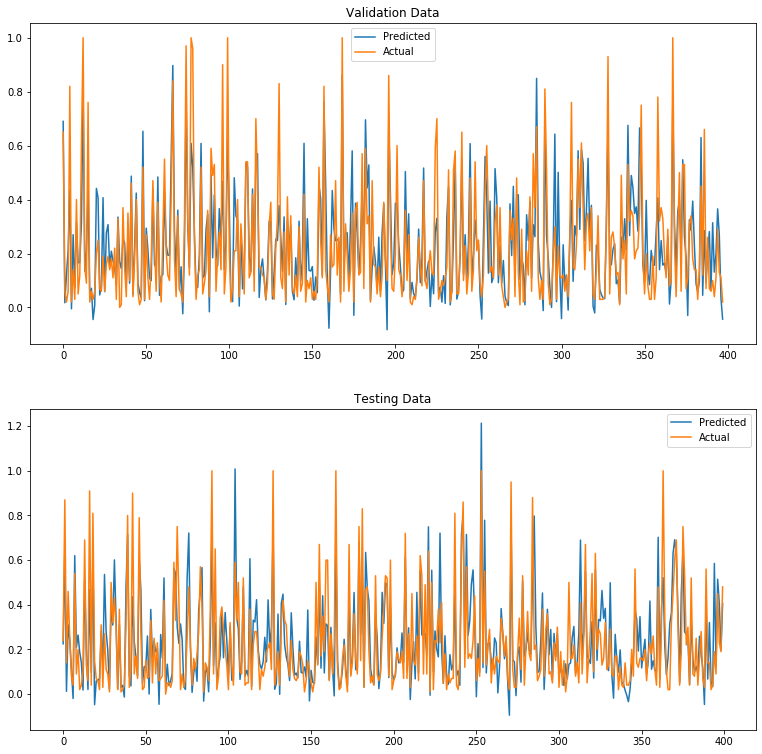

In [60]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(2, 1, 1)
ax.plot(out.predict(X_val), label='Predicted')
ax.plot(Y_val.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Validation Data')
ax = fig.add_subplot(2, 1, 2)
ax.plot(out.predict(X_test), label='Predicted')
ax.plot(Y_test.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Testing Data')

Lasso Regression

Text(0.5, 1.0, 'Coefficients vs Alpha')

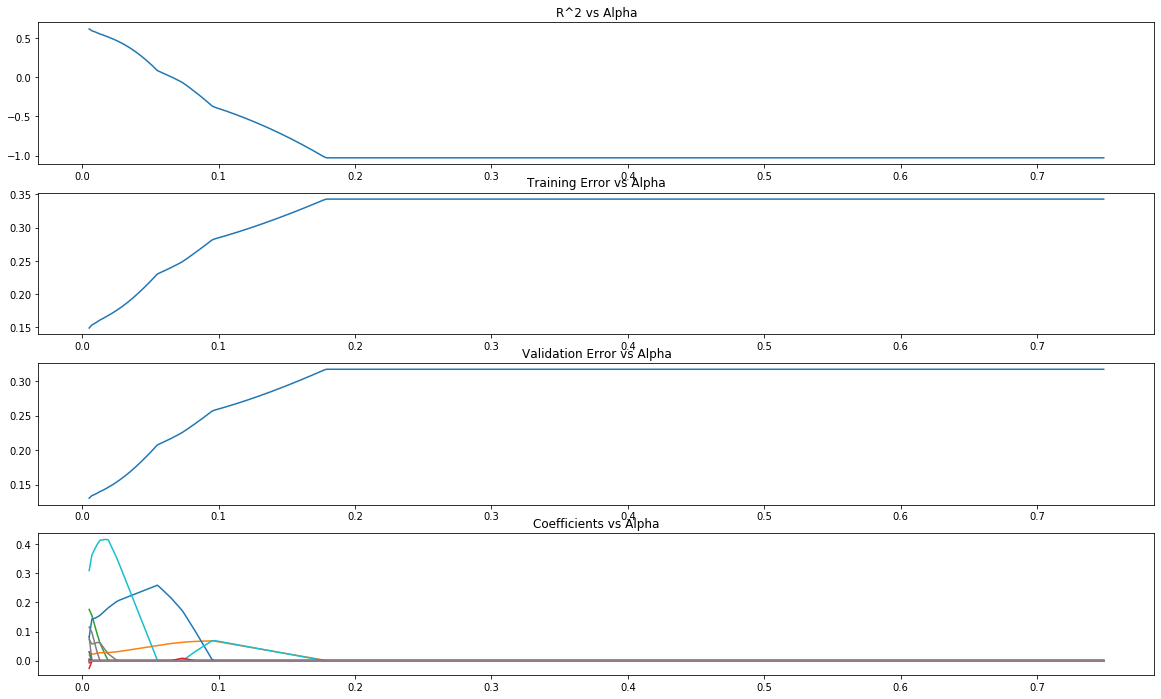

In [61]:
# get some alphas/lambdas to try
import numpy 

alphas = numpy.arange(0.005, 0.75, 0.002)
r_2 = []
coeff = []
train_acc = []
val_acc = []

# try them
# we'll also store
#  - the R^2 of the learned model
#  - the coeffiients
#  - the training and validation accuracies
for a in alphas:
    lasso_model = Lasso(fit_intercept=False, alpha=a).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
    r_2.append(lasso_model.score(X = X_train.to_numpy(), y = Y_train.to_numpy()))
    coeff.append(lasso_model.coef_)
    train_acc.append(numpy.sqrt(numpy.mean((lasso_model.predict(X_train.to_numpy()) - Y_train.to_numpy())**2)))
    val_acc.append(numpy.sqrt(numpy.mean((lasso_model.predict(X_val.to_numpy()) - Y_val.to_numpy())**2)))
    
# do some plots
fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot(4, 1, 1)
ax.plot(alphas, r_2)
ax.set_title('R^2 vs Alpha')
ax = fig.add_subplot(4, 1, 2)
ax.plot(alphas, train_acc)
ax.set_title('Training Error vs Alpha')
ax = fig.add_subplot(4, 1, 3)
ax.plot(alphas, val_acc)
ax.set_title('Validation Error vs Alpha')
ax = fig.add_subplot(4, 1, 4)
ax.plot(alphas, coeff)
ax.set_title('Coefficients vs Alpha')

0.005


Text(0.5, 1.0, 'Testing Data')

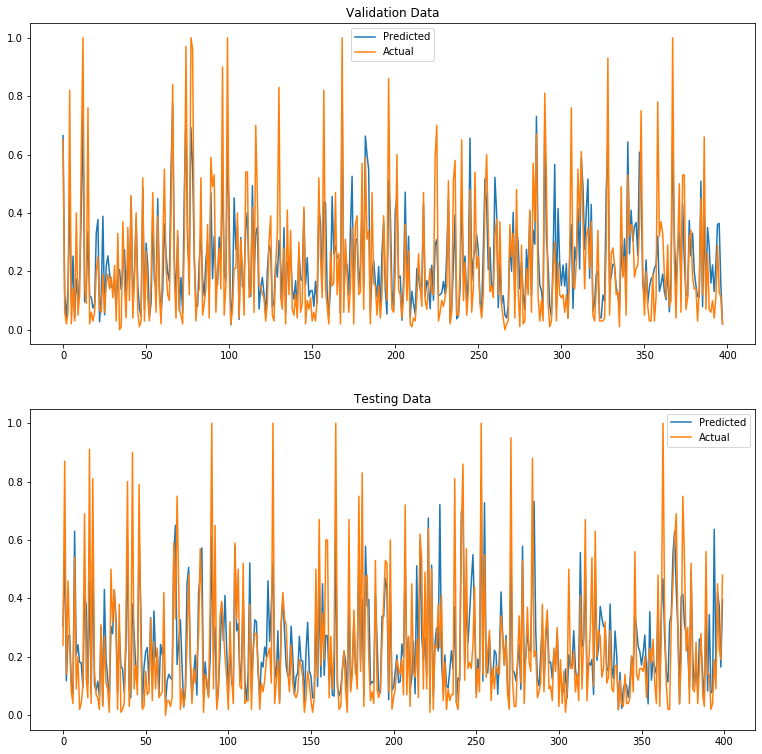

In [62]:
best_lasso_alpha = alphas[val_acc.index(min(val_acc))]
print(best_lasso_alpha)
lasso_model = Lasso(fit_intercept=False, alpha=best_lasso_alpha).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(2, 1, 1)
ax.plot(lasso_model.predict(X_val), label='Predicted')
ax.plot(Y_val.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Validation Data')
ax = fig.add_subplot(2, 1, 2)
ax.plot(lasso_model.predict(X_test), label='Predicted')
ax.plot(Y_test.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Testing Data')

Ridge Regression

Text(0.5, 1.0, 'Coefficients vs Alpha')

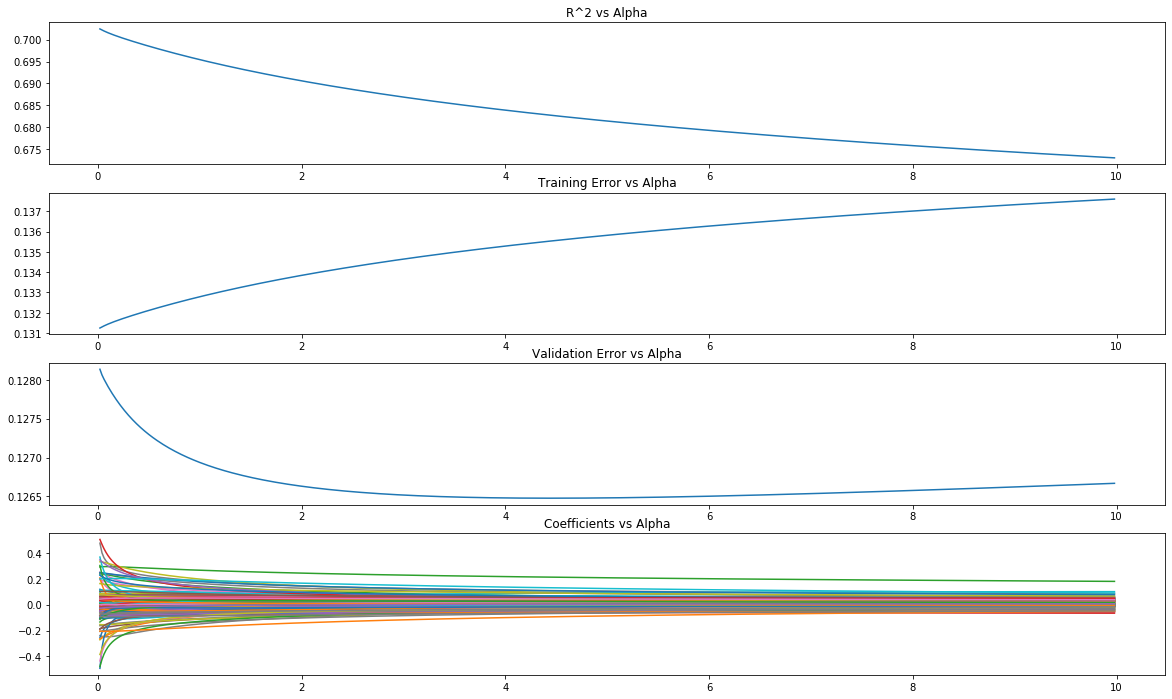

In [63]:
alphas = numpy.arange(0.02, 10, 0.02)
r_2 = []
coeff = []
train_acc = []
val_acc = []
# compute ridge models, storing data as we did for Lasso
for a in alphas:
    glenn = Ridge(fit_intercept=False, alpha=a).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
    r_2.append(glenn.score(X = X_train.to_numpy(), y = Y_train.to_numpy()))
    coeff.append(glenn.coef_)
    train_acc.append(numpy.sqrt(numpy.mean((glenn.predict(X_train.to_numpy()) - Y_train.to_numpy())**2)))
    val_acc.append(numpy.sqrt(numpy.mean((glenn.predict(X_val.to_numpy()) - Y_val.to_numpy())**2)))

# plotting
fig = plt.figure(figsize=[20, 12])
ax = fig.add_subplot(4, 1, 1)
ax.plot(alphas, r_2)
ax.set_title('R^2 vs Alpha')
ax = fig.add_subplot(4, 1, 2)
ax.plot(alphas, train_acc)
ax.set_title('Training Error vs Alpha')
ax = fig.add_subplot(4, 1, 3)
ax.plot(alphas, val_acc)
ax.set_title('Validation Error vs Alpha')
ax = fig.add_subplot(4, 1, 4)
ax.plot(alphas, coeff)
ax.set_title('Coefficients vs Alpha')

4.4399999999999995


Text(0.5, 1.0, 'Testing Data')

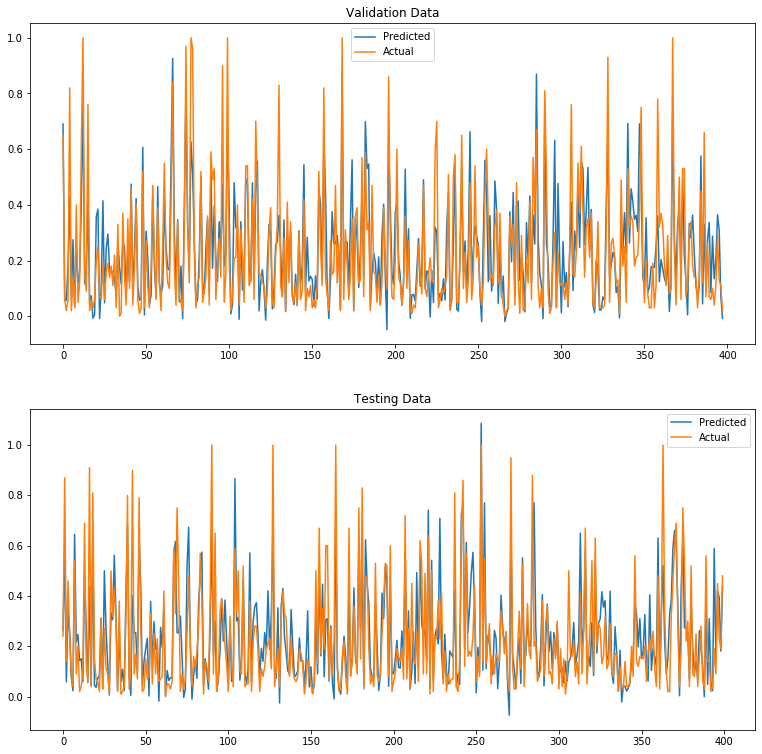

In [65]:
best_ridge_alpha = alphas[val_acc.index(min(val_acc))]
print(best_ridge_alpha)
glenn = Ridge(fit_intercept=False, alpha=best_ridge_alpha).fit(X = X_train.to_numpy(), y = Y_train.to_numpy())
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(2, 1, 1)
ax.plot(glenn.predict(X_val), label='Predicted')
ax.plot(Y_val.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Validation Data')
ax = fig.add_subplot(2, 1, 2)
ax.plot(glenn.predict(X_test), label='Predicted')
ax.plot(Y_test.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Testing Data')

Text(0.5, 1.0, 'Testing Data')

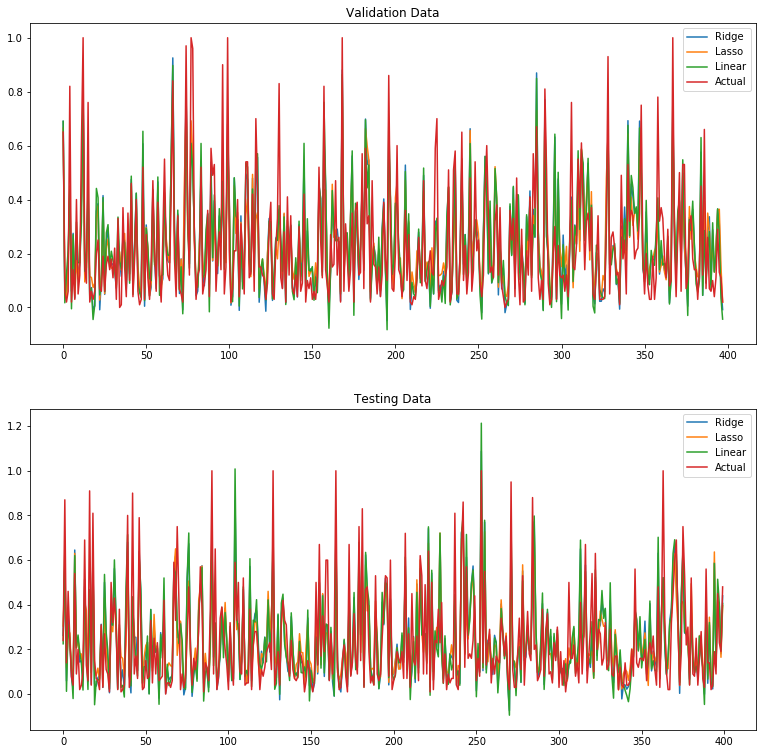

In [66]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(2, 1, 1)
ax.plot(glenn.predict(X_val), label='Ridge')
ax.plot(lasso_model.predict(X_val), label='Lasso')
ax.plot(out.predict(X_val), label='Linear')
ax.plot(Y_val.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Validation Data')
ax = fig.add_subplot(2, 1, 2)
ax.plot(glenn.predict(X_test), label='Ridge')
ax.plot(lasso_model.predict(X_test), label='Lasso')
ax.plot(out.predict(X_test), label='Linear')
ax.plot(Y_test.to_numpy(), label='Actual')
ax.legend()
ax.set_title('Testing Data')

In [67]:
print('Linear Model, Test RMSE: ' + str(numpy.sqrt(numpy.mean((out.predict(X_test.to_numpy()) - Y_test.to_numpy())**2))))
print('Lasso Model, Test RMSE:  ' + str(numpy.sqrt(numpy.mean((lasso_model.predict(X_test.to_numpy()) - Y_test.to_numpy())**2))))
print('Ridge Model, Test RMSE:  ' + str(numpy.sqrt(numpy.mean((glenn.predict(X_test.to_numpy()) - Y_test.to_numpy())**2))))

Linear Model, Test RMSE: 0.13663131077015342
Lasso Model, Test RMSE:  0.14032160148380318
Ridge Model, Test RMSE:  0.13337810483643836
